# V.V Imp Work on preprocessing steps from DL notebook and also do each type on wine dataset

### Preprocessing

In [1]:
## PRe-processing
# Drop null values
# bank.dropna(inplace=True)

# Remove two columns name is 'default' and 'loan'
# bank=bank.drop(['default', 'loan'], axis=1)

# get names of indexes for which
# column duration has value < 60
# index_names = bank[ bank['duration'] < 60 ].index
# drop these row indexes
# from dataFrame
# bank.drop(index_names, inplace = True)


# count the number of occurrences of each job type
# job_counts = bank["job"].value_counts()
# filter out the job types that have a count less than 2
# jobs_to_drop = job_counts[job_counts < 2].index.tolist()
# drop the rows that correspond to the filtered job types from the original DataFrame
# bank.drop(bank[bank["job"].isin(jobs_to_drop)].index, inplace=True)

# print the modified DataFrame
# print(bank)


# from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder object
# le = LabelEncoder()
# Encode the 'job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', and 'y' columns
# bank['job'] = le.fit_transform(bank['job'])
# bank['marital'] = le.fit_transform(bank['marital'])
# bank['education'] = le.fit_transform(bank['education'])
# bank['housing'] = le.fit_transform(bank['housing'])
# bank['contact'] = le.fit_transform(bank['contact'])
# bank['month'] = le.fit_transform(bank['month'])
# bank['poutcome'] = le.fit_transform(bank['poutcome'])
# Since y is already classified and hence this does not need to be standarized as per Wine data
# bank['y'] = le.fit_transform(bank['y'])
# bank

# One hot encoding

# one_hot_encoded_data = pd.get_dummies(data, columns = ['Remarks', 'Gender'])
# print(one_hot_encoded_data)

#checking for null values
# bank.isnull().sum()

#Normalization of features if required
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X_scaled=scaler.fit_transform(X_1)
# X_scaled

#filling null values
#house['City'].fillna(method='ffill',inplace=True)
#house['Facing'].fillna(value="North",inplace=True)
#df[column].fillna(value=df[column].mean(), inplace=True)

# First do standarization, then split into targets and features

#Target
#y=bank['y']
# Features
#X=bank.drop(['y'],axis=1)




### PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [4]:
wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Here all columns are numeric, if that is not the case maybe one hot encoding or label encoding is to be used as per the question

## PREPROCESSING THE DATASET

In [5]:
y=wine['Wine']
y

# Segregating Target column

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [6]:
# Features
X=wine.drop(['Wine'],axis=1)
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
X.shape

(178, 13)

## STANDARISATION

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

# X_scaled is a numpy array of shape X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [9]:
X_scaled.shape

(178, 13)

In [10]:
X_df=pd.DataFrame(X_scaled)
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


The code you provided is using the StandardScaler class from the sklearn.preprocessing module to standardize the input data X.

The fit_transform method is then called on the sc object to standardize X. This method applies the standardization to X and returns a new array X_scaled with the standardized values.

Standardization is a common preprocessing step in machine learning that transforms the data so that it has a mean of 0 and a standard deviation of 1. This is often done to make the data easier to work with for certain algorithms or to compare different features that may have different scales.

In this code, X is assumed to be a numpy array or a pandas dataframe containing the features to be standardized. The standardized features are then stored in X_scaled which can be used for further analysis or modeling.

## CONSTRUCTION OF THE COVARIANCE MATRIX

In [11]:
cm=np.cov(X_scaled.T)
cm

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

The provided code calculates the covariance matrix cm of the standardized data X_scaled.

The np.cov function from the NumPy library is used to calculate the covariance matrix. The T method is called on X_scaled to transpose the data so that each row represents a variable, and each column represents an observation.

The resulting cm matrix is a square matrix where each element cm[i,j] represents the covariance between variables i and j. The diagonal elements cm[i,i] represent the variance of variable i.

The covariance matrix is a useful tool in data analysis and machine learning because it provides information about the relationships between variables. Positive covariance indicates that two variables tend to increase or decrease together, while negative covariance indicates that they tend to move in opposite directions. The magnitude of the covariance indicates the strength of the relationship.

Note that calculating the covariance matrix is often a necessary step before performing principal component analysis (PCA) or other multivariate techniques.

In [12]:
cm.shape

(13, 13)

## Finding eigen value, eigen vector

In [13]:
eig_val,eig_vec=np.linalg.eig(cm)
eig_val 

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
       0.29051203, 0.22706428, 0.25232001])

The code you provided calculates the eigenvalues and eigenvectors of the covariance matrix cm using the NumPy linalg.eig function.

The eig function returns a tuple (eig_val, eig_vec) containing the eigenvalues and eigenvectors of the matrix cm.

The line eig_val you provided prints out the eigenvalues of the covariance matrix, which are stored in the eig_val variable.

The eigenvalues represent the amount of variance explained by each principal component (PC) in a principal component analysis (PCA). The eigenvectors represent the direction of each principal component.

The eigenvalues are sorted in descending order, so the first eigenvalue represents the largest amount of variance explained by any PC, the second eigenvalue represents the second largest amount of variance explained, and so on.

In general, PCs with larger eigenvalues explain more of the variation in the data, and are therefore more important in describing the underlying structure of the data.


In [14]:
eig_vec

array([[-0.1443294 ,  0.48365155, -0.20738262,  0.0178563 , -0.26566365,
         0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
        -0.50861912, -0.22591696,  0.21160473],
       [ 0.24518758,  0.22493093,  0.08901289, -0.53689028,  0.03521363,
         0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
         0.07528304,  0.07648554, -0.30907994],
       [ 0.00205106,  0.31606881,  0.6262239 ,  0.21417556, -0.14302547,
         0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
         0.30769445, -0.49869142, -0.02712539],
       [ 0.23932041, -0.0105905 ,  0.61208035, -0.06085941,  0.06610294,
        -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
        -0.20044931,  0.47931378,  0.05279942],
       [-0.14199204,  0.299634  ,  0.13075693,  0.35179658,  0.72704851,
         0.03814394, -0.3228833 , -0.05677422, -0.15636143,  0.06222011,
        -0.27140257,  0.07128891,  0.06787022],
       [-0.39466085,  0.065039

In [15]:
eig_vec.shape

(13, 13)

## Sorting eigen values

In [16]:
sorted_eig_val=[i for i in sorted(eig_val, reverse=True)]
sorted_eig_val

[4.7324369775835935,
 2.511080929645125,
 1.4542418678464686,
 0.9241658668248736,
 0.8580486765371114,
 0.6452822124678544,
 0.5541414662457832,
 0.3504662749462544,
 0.29051203269397685,
 0.252320010360825,
 0.2270642817308853,
 0.16972373898012166,
 0.10396199182075287]

## Choosing the dimension =2

In [17]:
tot=sum(sorted_eig_val)
tot

13.073446327683627

In [18]:
exp_var=[(i/tot) for i in sorted_eig_val]
exp_var

[0.36198848099926334,
 0.19207490257008936,
 0.11123630536249988,
 0.07069030182714023,
 0.06563293679648599,
 0.049358233192225646,
 0.04238679322623316,
 0.026807489483788666,
 0.022221534047897087,
 0.01930019093944079,
 0.017368356899899164,
 0.01298232575604214,
 0.007952148898994487]

In [19]:
cum_exp_var=np.cumsum(exp_var)
cum_exp_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

## Plotting

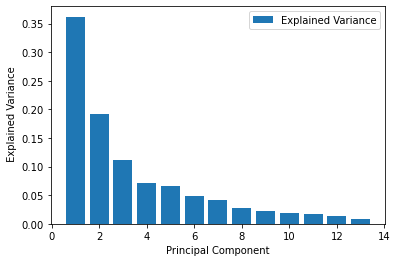

In [20]:
# This value for range will change based on the number of principal components derived from the dataset as per above step
# This is also equivalent to the number of features in the dataset excluding target
plt.bar(range(1,14), exp_var,label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel(' Explained Variance')
plt.legend();

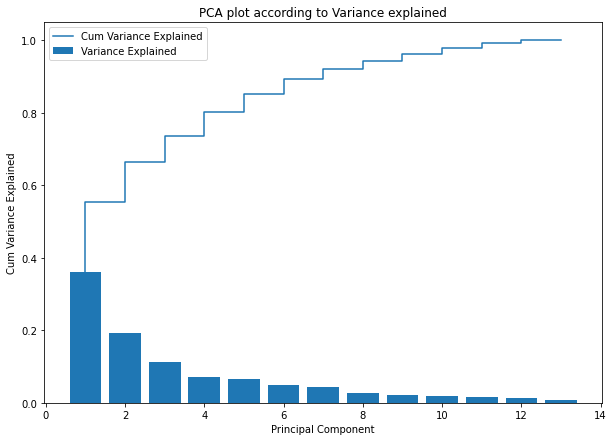

In [21]:
plt.figure(figsize=(10,7))
plt.bar(range(1,14),exp_var, label= 'Variance Explained');
plt.step(range(1,14),cum_exp_var,label='Cum Variance Explained');
plt.xlabel('Principal Component')
plt.ylabel('Cum Variance Explained')
plt.title('PCA plot according to Variance explained')
plt.legend()
plt.show()

## Construction of projection matrix

In [22]:
eigen_pair=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]
eigen_pair

[(4.7324369775835935,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.511080929645125,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464686,
  array([-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
          0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
          0.08522192,  0.16600459, -0.12674592])),
 (0.9241658668248736,
  array([ 0.0178563 , -0.53689028,  0.21417556, -0.06085941,  0.35179658,
         -0.19806835, -0.15229479,  0.20330102, -0.39905653, -0.06592568,
          0.42777141, -0.18412074,  0.23207086])),
 (0.8580486765371114,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841,

The code you provided creates a list of tuples called eigen_pair, where each tuple contains the absolute value of an eigenvalue and the corresponding eigenvector from the eig_val and eig_vec arrays, respectively.

The list is created using a list comprehension that iterates over the length of eig_val, creating a tuple for each index i. The np.abs function is used to take the absolute value of each eigenvalue, which ensures that they are sorted in descending order based on magnitude.

The eig_vec[:,i] expression extracts the eigenvector corresponding to the i-th eigenvalue, using NumPy's indexing syntax for a two-dimensional array.

The resulting eigen_pair list contains tuples where the first element is the absolute value of the eigenvalue, and the second element is the corresponding eigenvector. This list can be sorted based on the eigenvalues to determine the principal components that explain the most variance in the data.

In [23]:
# Taking only 2 dimension

w=np.hstack((eigen_pair[0][1][:,np.newaxis],
            eigen_pair[1][1][:,np.newaxis]))

In [24]:
w
# This is the pairwise elements from the first two principal components

array([[-0.1443294 ,  0.48365155],
       [ 0.24518758,  0.22493093],
       [ 0.00205106,  0.31606881],
       [ 0.23932041, -0.0105905 ],
       [-0.14199204,  0.299634  ],
       [-0.39466085,  0.06503951],
       [-0.4229343 , -0.00335981],
       [ 0.2985331 ,  0.02877949],
       [-0.31342949,  0.03930172],
       [ 0.0886167 ,  0.52999567],
       [-0.29671456, -0.27923515],
       [-0.37616741, -0.16449619],
       [-0.28675223,  0.36490283]])

The code you provided selects the first two eigenvectors (i.e., the eigenvectors corresponding to the two largest eigenvalues) from the eigen_pair list, and stacks them horizontally using NumPy's hstack function.

The resulting matrix w has two columns, where each column contains the weights (i.e., coefficients) assigned to each standardized feature by the corresponding principal component.

By stacking the first two eigenvectors horizontally, w defines a 2-dimensional subspace of the original feature space. This subspace represents the most important directions (i.e., dimensions) of variation in the data, as determined by the PCA.

This operation effectively reduces the dimensionality of the data from the original number of features to 2, while retaining as much of the original variation in the data as possible.

In [25]:
w.shape

(13, 2)

## Transforming 13 dim data to 2 dim

In [26]:
X_scaled.shape

(178, 13)

In [27]:
w.shape

(13, 2)

In [28]:
new_X=X_scaled.dot(w)
new_X

array([[-3.31675081,  1.44346263],
       [-2.20946492, -0.33339289],
       [-2.51674015,  1.0311513 ],
       [-3.75706561,  2.75637191],
       [-1.00890849,  0.86983082],
       [-3.05025392,  2.12240111],
       [-2.44908967,  1.17485013],
       [-2.05943687,  1.60896307],
       [-2.5108743 ,  0.91807096],
       [-2.75362819,  0.78943767],
       [-3.47973668,  1.30233324],
       [-1.7547529 ,  0.61197723],
       [-2.11346234,  0.67570634],
       [-3.45815682,  1.13062988],
       [-4.31278391,  2.09597558],
       [-2.3051882 ,  1.66255173],
       [-2.17195527,  2.32730534],
       [-1.89897118,  1.63136888],
       [-3.54198508,  2.51834367],
       [-2.0845222 ,  1.06113799],
       [-3.12440254,  0.78689711],
       [-1.08657007,  0.24174355],
       [-2.53522408, -0.09184062],
       [-1.64498834, -0.51627893],
       [-1.76157587, -0.31714893],
       [-0.9900791 ,  0.94066734],
       [-1.77527763,  0.68617513],
       [-1.23542396, -0.08980704],
       [-2.18840633,

The code you provided applies the transformation matrix w to the standardized input data X_scaled, resulting in a new two-dimensional dataset new_X that represents the original data projected onto the 2D subspace defined by the first two principal components.

The dot method of the NumPy ndarray object is used to perform matrix multiplication between X_scaled and w, resulting in a new matrix with the same number of rows as X_scaled and two columns (i.e., the number of principal components selected).

The resulting new_X matrix contains the transformed data in the reduced 2D subspace. Each row of new_X represents an observation in the original data, and the two columns represent the values along the first and second principal components.

This new representation of the data is often used for data visualization or as input to machine learning algorithms that require lower-dimensional input. It can also be used to understand the relationships between variables and identify patterns in the data that may not be easily visible in the original feature space.

In [29]:
new_X.shape

(178, 2)

## Visualising the projected data

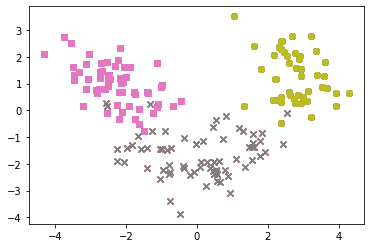

In [30]:
for l in np.unique(y):
    plt.scatter(new_X[y==1,0], new_X[y==1,1],marker='s')
    plt.scatter(new_X[y==2,0], new_X[y==2,1],marker='x')
    plt.scatter(new_X[y==3,0], new_X[y==3,1],marker='o')

The code you provided creates a scatter plot of the transformed data new_X with different markers and colors for each class label in y.

The np.unique function is used to find the unique values in y, which represent the class labels of the observations in the original data.

For each unique label, the plt.scatter function is called three times, each time plotting the points in new_X that correspond to the observations with the given label using a different marker shape.

The marker argument is used to specify the shape of the marker used to plot the points for each class. The s marker is a square, the x marker is an x-shaped cross, and the o marker is a circle.

## Using Sklearn

In [31]:
# Direct method
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X_scaled)

The code you provided performs PCA using scikit-learn's PCA class, setting the n_components parameter to 0.95.

This means that PCA will automatically determine the minimum number of principal components necessary to explain at least 95% of the variance in the data. The resulting transformed data X_pca will have a reduced number of features equal to the number of selected principal components.

The fit_transform method of the PCA object is called on the standardized input data X_scaled. This method first fits the PCA model to the data (i.e., calculates the eigenvectors and eigenvalues of the covariance matrix) and then applies the transformation to the data (i.e., projects the data onto the principal components).

The resulting X_pca matrix has the same number of rows as X_scaled (i.e., the number of observations) and a reduced number of columns equal to the number of principal components selected by PCA. These new columns represent the transformed features that capture the most important patterns of variation in the original data.

Note that setting n_components to a value less than 1.0 is a common practice in PCA, as it allows for the automatic determination of the minimum number of principal components required to capture a specified amount of variance in the data. This can be especially useful for large datasets with many features, where manually selecting the number of components can be difficult or impractical.

In [32]:
pca.components_.T[:,1]

array([-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
       -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
        0.27923515,  0.16449619, -0.36490283])

The code you provided accesses the second principal component of the PCA model pca using the components_ attribute.

The components_ attribute is a matrix whose columns are the principal components of the data, sorted in descending order of the amount of variance they explain. Therefore, the second principal component can be accessed by indexing the second column of pca.components_, which is achieved by using the [:, 1] indexing syntax.

Note that the components are typically returned as row vectors, so the T attribute is used to transpose the matrix and obtain the second principal component as a column vector instead.

The resulting vector represents the weights of each original feature in the second principal component. These weights indicate the contribution of each feature to the variation captured by the second principal component.

In [33]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

The code pca.explained_variance_ratio_ returns an array of the proportion of variance in the data that is explained by each principal component in the PCA model pca.

Each element of the array corresponds to a principal component, and the elements are sorted in descending order of the amount of variance explained. The sum of all the elements in the array equals 1.0, since the total variance in the data is fully explained by the principal components.

The explained_variance_ratio_ attribute can be useful for understanding the amount of information retained by each principal component, and for deciding how many principal components to include in the final reduced-dimensionality dataset.

For example, if the first two principal components explain a large proportion of the variance in the data (e.g., 90%), it might be appropriate to reduce the data to just those two components to preserve most of the important information while discarding noise or unimportant variability captured by the remaining components.

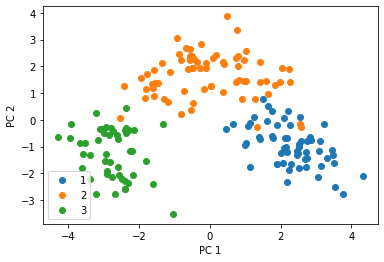

In [34]:
#another way of ploting
for l in np.unique(y):
    plt.scatter(X_pca[y==l, 0],
            X_pca[y==l, 1], label=l)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

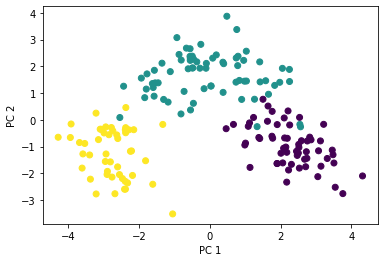

In [35]:
#another way of plotting the graph best method
#plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC 1')
plt.ylabel('PC 2');

In [36]:
pca.get_params(deep=True)

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 0.95,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

The get_params method is a function available in the PCA class of the sklearn.decomposition module in Python, which is used for principal component analysis. The get_params method is used to get the parameters of the PCA estimator. Here is what the pca.get_params(deep=True) code does:

pca is an instance of the PCA class, which has been previously created and fitted to some data.
The get_params method is called on this instance with the parameter deep set to True.
The get_params method returns a dictionary containing the parameters of the estimator, with their names as keys and their values as values.
The deep parameter controls whether the method should recursively return the parameters of nested estimators, if any. When deep=True, the method returns the parameters of the nested estimators as well. If deep=False, only the top-level parameters are returned.

By calling pca.get_params(deep=True), you can obtain a dictionary containing all the parameters of the PCA estimator and the nested estimators, if any. This can be useful for inspecting and debugging the PCA estimator, as well as for reproducing the analysis on new data.

# LDA and LLE

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
wine=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [39]:
wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [40]:
# Seperation inot features and target

X=wine.drop(['Wine'],axis=1)
X

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [41]:
X.shape

(178, 13)

In [42]:
y=wine['Wine']
y.shape

(178,)

## Standardisation of features

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Building the LDA model

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
y.unique()

array([1, 2, 3], dtype=int64)

In [46]:
# n_components <= min(n_classes-1, n_features)
#              <= min(3-1, 13)
#               = 2, the dim of the hyperplane onto which we want to project

lda=LinearDiscriminantAnalysis(n_components=2)

## Transformation of the data

In [47]:
X_lda=lda.fit_transform(X_scaled,y)

In [48]:
X_lda

array([[ 4.70024401,  1.97913835],
       [ 4.30195811,  1.17041286],
       [ 3.42071952,  1.42910139],
       [ 4.20575366,  4.00287148],
       [ 1.50998168,  0.4512239 ],
       [ 4.51868934,  3.21313756],
       [ 4.52737794,  3.26912179],
       [ 4.14834781,  3.10411765],
       [ 3.86082876,  1.95338263],
       [ 3.36662444,  1.67864327],
       [ 4.80587907,  2.23536271],
       [ 3.42807646,  2.17510939],
       [ 3.66610246,  2.26248961],
       [ 5.58824635,  2.05478773],
       [ 5.50131449,  3.61304865],
       [ 3.18475189,  2.88952528],
       [ 3.28936988,  2.76584266],
       [ 2.99809262,  1.42511132],
       [ 5.24640372,  3.70982655],
       [ 3.13653106,  1.97689922],
       [ 3.57747791,  0.5624599 ],
       [ 1.69077135,  0.91342136],
       [ 4.83515033,  0.9147628 ],
       [ 3.09588961,  0.61735888],
       [ 3.32164716,  0.29847734],
       [ 2.14482223,  0.16369247],
       [ 3.9824285 ,  2.17515679],
       [ 2.68591432,  1.21850924],
       [ 3.56309464,

This code appears to fit a dataset X_scaled to a linear discriminant analysis (LDA) model, and transform the original data to a new feature space using the fitted model.

In more detail, lda is an instance of the LDA class, which is a supervised learning algorithm used for dimensionality reduction and classification. fit_transform is a method of this class that combines the fitting and transformation steps, taking as input the feature matrix X_scaled and the target vector y.

The output of this operation is stored in X_lda, which should be a new feature matrix that has been transformed to a new space where the classes are better separated. Each row of X_lda represents a data point in the new space, and the number of columns corresponds to the number of classes minus one (i.e., if there are three classes, X_lda would have two columns).

## Visualisation of the transformed data

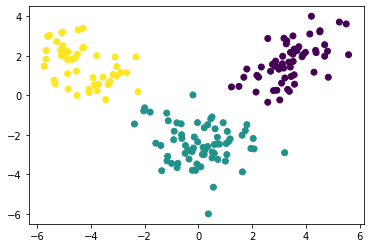

In [49]:
plt.scatter(X_lda[:,0],X_lda[:,1],c=y);

This code is likely plotting the two-dimensional projection of the transformed data X_lda onto its first two linear discriminants using a scatter plot, where each data point is colored based on its corresponding class label y.

Specifically, plt is a shorthand for the matplotlib.pyplot library, which provides a set of functions for creating visualizations. scatter is a method of this library that generates a scatter plot, where each point is represented as a dot on the x-y plane.

The input to scatter are the first two columns of X_lda, accessed using X_lda[:,0] and X_lda[:,1], which represent the two discriminant axes that capture the most discriminative information in the data. The c argument is set to y, which assigns a color to each point based on its class label.

Overall, this code allows us to visualize the separation of the classes in the transformed feature space, which can help us understand how well the LDA algorithm has performed in separating the classes.

# Locally Linear Embedding

LLE (Locally Linear Embedding) and LDA (Linear Discriminant Analysis) are both dimensionality reduction techniques, but they are used in different contexts and for different purposes.

LLE is a non-linear dimensionality reduction technique used to discover the underlying structure of high-dimensional data when that structure is assumed to be nonlinear. LLE works by finding a lower-dimensional representation of the data that preserves the local structure of the data. It does this by first finding the nearest neighbors of each point in the high-dimensional space, and then representing each point as a linear combination of its neighbors. The weights of these linear combinations are then used to compute a lower-dimensional representation of the data. LLE is typically used for exploratory data analysis and visualization, as well as for feature extraction.

On the other hand, LDA is a supervised learning algorithm that is used to find a linear combination of features that separates classes in a dataset. Specifically, LDA identifies the linear discriminants that maximize the ratio of the between-class variance to the within-class variance. This means that LDA tries to find the direction in the data that best separates the different classes. LDA is typically used in classification tasks, where the goal is to predict the class of a new data point based on its features. LDA can also be used for exploratory data analysis and visualization, but its primary use case is classification.

In summary, LLE is used when we want to discover the underlying structure of high-dimensional data when that structure is assumed to be nonlinear. LDA, on the other hand, is used when we want to find a linear combination of features that separates classes in a dataset. While both techniques can be used for exploratory data analysis and visualization, LLE is more commonly used for these purposes, while LDA is primarily used for classification.

In [50]:
from sklearn.datasets import make_swiss_roll

The make_swiss_roll function is a utility function provided in the Scikit-learn machine learning library that generates a 3D dataset with a non-linear, Swiss roll-like structure.

This function takes several arguments, including the number of samples, noise level, and a random state. Specifically, the n_samples parameter controls the number of samples to generate, noise controls the amount of random noise to add to the data, and random_state controls the random seed for the dataset.

The output of make_swiss_roll is a tuple containing three arrays: X, y, and t. The X array contains the 3D coordinates of the samples, the y array contains the target values for each sample, and the t array contains the unrolled 2D coordinates of the samples.

This function is commonly used in machine learning experiments as a toy dataset for testing and evaluating dimensionality reduction techniques and visualization methods. Because the dataset has a known structure, it can be used to evaluate the effectiveness of different algorithms in recovering the underlying structure of the data. Additionally, because the dataset has a visually appealing structure, it is often used to generate interesting and informative visualizations of the data.

In [51]:
X,y=make_swiss_roll(n_samples=1000, random_state=100)
X

array([[-9.02243256,  0.58237783, -3.91158679],
       [ 3.63249892,  8.02698255,  6.37347947],
       [-6.59990375, 20.01826915,  5.68894892],
       ...,
       [ 6.06643253, 20.59885419, -0.90994904],
       [ 1.72607563,  7.66075992, -4.75699209],
       [-6.24197451, 16.34985863, -8.25349579]])

The code you provided generates a 3D dataset with a Swiss roll-like structure using the make_swiss_roll function from Scikit-learn, with 1000 samples and a random state of 100.

The line X, y = make_swiss_roll(n_samples=1000, random_state=100) assigns the output of the make_swiss_roll function to two variables, X and y. X is a numpy array with shape (1000, 3), where each row represents the 3D coordinates of a sample, and y is a numpy array with shape (1000,), where each element represents the target value for a sample.

Finally, the line X simply prints the X array to the console, which displays the 3D coordinates of each sample. The output will be a numpy array with shape (1000, 3), where each row represents the 3D coordinates of a sample in the dataset. The values in the array will depend on the random state used to generate the data.

In [52]:
y

array([ 9.8338599 ,  7.33595863,  8.71337301, 12.67421645,  4.75686315,
        5.85815095, 11.03405017, 12.49586783,  6.00081823, 10.13251592,
       13.11290049,  6.68407253,  6.4590663 ,  5.73381711,  6.78298907,
       13.93570086, 12.36232244,  6.33289485, 12.405126  ,  7.29547319,
        8.78110506, 13.57196131, 12.41855283,  7.88016948,  6.36559356,
        8.22624823,  4.7660019 ,  7.09145131, 12.21133145,  4.8561637 ,
       10.35635484, 10.40311269,  5.70338257,  8.31212114,  5.05616771,
       13.10432026, 13.95735025,  5.27732892, 13.10558677, 10.14955752,
       11.71009519, 10.65173266, 10.19612245,  4.90502326,  6.69184284,
        9.84592302, 11.96112869,  7.07513585,  7.40689238, 12.74602342,
       13.90160869, 13.0519348 ,  8.10067058, 10.35650158,  8.05625884,
        7.91860622,  6.39076277,  6.95260412,  5.13520603,  9.47596798,
        8.25848482, 10.29944826, 10.64945129,  6.05636528, 13.51363588,
       13.63180922, 10.38890125,  8.36700007,  8.13535528,  6.63

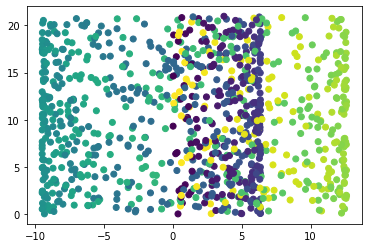

In [53]:
plt.scatter(X[:,0],X[:,1],c=y);

The x-axis and y-axis of the above graph represent the values of the first and second features, respectively, of the data points being plotted.

Assuming that X is a numpy array with two or more columns, X[:,0] refers to the first column of X, and X[:,1] refers to the second column of X. Therefore, the x-axis of the scatter plot corresponds to the values of the first feature, and the y-axis corresponds to the values of the second feature.

The plot shows how the data points are distributed in the two-dimensional space defined by these two features. The color of each point indicates its corresponding label, which can be used to identify any patterns or clusters in the data.

## Building the model

In [54]:
from sklearn.manifold import LocallyLinearEmbedding

In [55]:
lle=LocallyLinearEmbedding(n_neighbors=10,n_components=2)

The code you provided creates an instance of the LocallyLinearEmbedding class from Scikit-learn with two hyperparameters, n_neighbors and n_components, set to 10 and 2, respectively.

LocallyLinearEmbedding is a non-linear dimensionality reduction technique that tries to preserve the local structure of high-dimensional data in a lower-dimensional space. Specifically, it finds a lower-dimensional representation of the data such that nearby points in the high-dimensional space remain nearby in the low-dimensional space. It does this by computing the weights for linear combinations of neighboring points, and using these weights to map the high-dimensional data to a lower-dimensional space.

The n_neighbors parameter specifies the number of nearest neighbors to consider when computing the weights for each point. Increasing the value of n_neighbors can improve the quality of the embedding, but can also increase the computational complexity of the algorithm. The n_components parameter specifies the dimensionality of the output space, i.e., the number of dimensions in the lower-dimensional representation of the data.

By creating an instance of the LocallyLinearEmbedding class with n_neighbors=10 and n_components=2, the code is setting the number of neighbors to consider to 10, and the dimensionality of the output space to 2. This means that the algorithm will find a 2D representation of the data that preserves the local structure of the original data using the 10 nearest neighbors for each point. The resulting embedding can be used for visualization, clustering, or other downstream tasks.

## Transforming the data

In [56]:
X_lle=lle.fit_transform(X)
X_lle

array([[-0.00034981,  0.05148323],
       [ 0.02608563,  0.01025472],
       [ 0.01085642, -0.00058337],
       ...,
       [ 0.03429472, -0.06336828],
       [ 0.04373708, -0.03407539],
       [-0.00769678,  0.01826006]])

The code you provided applies the LocallyLinearEmbedding dimensionality reduction technique to the 3D Swiss roll dataset X using the instance of the LocallyLinearEmbedding class lle that was created with n_neighbors=10 and n_components=2.

The line X_lle = lle.fit_transform(X) fits the LocallyLinearEmbedding model to the input data X, and applies the learned transformation to the data to obtain a 2D representation of the data that preserves the local structure. The output of this line is a numpy array with shape (1000, 2), where each row represents the 2D coordinates of a sample in the new embedding space.

Finally, the line X_lle simply prints the X_lle array to the console, which displays the 2D coordinates of each sample in the new embedding space. The values in the array will depend on the random state used to generate the data, as well as the hyperparameters chosen for the LocallyLinearEmbedding algorithm.

## Visualisation

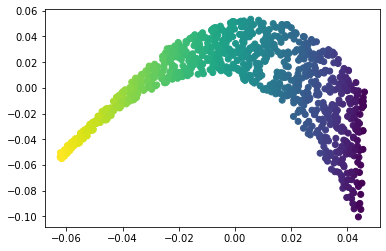

In [57]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

# Wine dataset with LLE

In [58]:
wine_lle=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')

In [59]:
wine_lle

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [60]:
y_lle=wine_lle['Wine']
y_lle

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

In [61]:
# Features
X_lle=wine.drop(['Wine'],axis=1)
X_lle

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X_lle)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [63]:
# Transform 

X_lle_trans=lle.fit_transform(X_scaled)
X_lle_trans

array([[-8.62269256e-02,  3.06191317e-02],
       [ 7.94151037e-02,  8.60817924e-02],
       [-7.39499216e-02,  2.79678400e-02],
       [-1.15712867e-01, -6.81888185e-03],
       [-4.76125354e-02,  7.99524114e-02],
       [-1.09891974e-01,  8.20051476e-03],
       [-4.47393649e-02,  1.01759945e-02],
       [-5.68485641e-02,  3.73993773e-02],
       [-6.00811660e-02,  1.47624335e-02],
       [-7.11712917e-02,  6.50420742e-03],
       [-9.78293903e-02, -5.46433802e-03],
       [-2.76914488e-02,  1.72636626e-02],
       [-4.73051390e-02,  4.33817810e-03],
       [ 5.63018762e-02,  1.58038294e-01],
       [-1.76909659e-02,  1.02319568e-01],
       [-1.02733932e-01,  1.60075011e-02],
       [-8.71970617e-02,  4.34247599e-02],
       [-7.73339955e-02,  5.16225134e-02],
       [-1.22280005e-01,  1.61171954e-03],
       [-8.62437768e-02, -9.06344800e-03],
       [-8.61528202e-02,  2.47991839e-02],
       [-8.45278476e-02, -8.05684629e-03],
       [-6.33391707e-02,  1.14401653e-02],
       [-5.

In [64]:
X_lle_trans.shape

(178, 2)

ValueError: 'c' argument has 1000 elements, which is inconsistent with 'x' and 'y' with size 178.

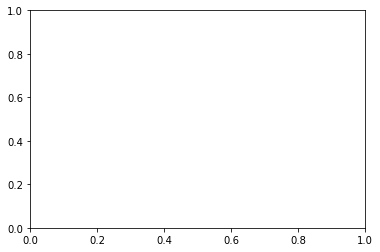

In [65]:
#plt.figure(figsize=(10, 10))
plt.scatter(X_lle_trans[:,0],X_lle_trans[:,1],c=y);

# TSNE

t-SNE (t-distributed stochastic neighbor embedding) is a popular nonlinear dimensionality reduction technique used for visualizing high-dimensional data. It was introduced in 2008 by Laurens van der Maaten and Geoffrey Hinton.

The main goal of t-SNE is to find a lower-dimensional representation of high-dimensional data that preserves the similarities between the data points. In other words, it tries to map similar data points to nearby points in the low-dimensional space, while keeping dissimilar points far apart. This makes it well-suited for visualizing clusters or groups of data points that share similar features.

t-SNE is a probabilistic method that models the similarity between two data points in high-dimensional space using a Gaussian distribution, and models the similarity between the same two data points in the low-dimensional space using a Student's t-distribution. The algorithm then tries to minimize the difference between the two distributions using a gradient descent optimization technique.

The t-SNE algorithm works in two main stages:

Compute pairwise similarities: The first stage of t-SNE involves computing pairwise similarities between all pairs of data points in the high-dimensional space. This is typically done using a Gaussian kernel, which assigns higher similarity scores to pairs of data points that are closer together.

Optimize low-dimensional embedding: In the second stage, t-SNE seeks to find a low-dimensional representation of the data that preserves the pairwise similarities computed in the first stage. It does this by minimizing a cost function that measures the difference between the pairwise similarities in the high-dimensional space and the pairwise similarities in the low-dimensional space. The cost function is optimized using a gradient descent algorithm.

t-SNE has become a popular technique for visualizing high-dimensional data because it is able to preserve the local and global structure of the data in the low-dimensional embedding. However, t-SNE is computationally expensive and can be sensitive to the choice of hyperparameters, such as the perplexity, which controls the balance between preserving local and global structure in the data.






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

## Accessing the dataset

In [ ]:
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)

The code you provided uses Scikit-learn's fetch_openml function to download and load the MNIST dataset, which is a popular dataset of handwritten digits.

The MNIST dataset contains 70,000 grayscale images of handwritten digits from 0 to 9, with 784 features (28x28 pixels) per image. The goal of the dataset is to classify each image into one of the 10 possible digits (0-9).

Here is a breakdown of the code:

fetch_openml: This function is a part of Scikit-learn's datasets module and is used to download and load datasets from the OpenML platform. In this case, we are using it to download the MNIST dataset.

'mnist_784': This is the name of the dataset we want to download.

version=1: This specifies which version of the dataset we want to download. In this case, we are downloading version 1.

return_X_y=True: This specifies that we want to return the input features X and the target labels y as separate variables.

X, y: These variables receive the input features and target labels, respectively, returned by fetch_openml.

After running this code, X will be a 2D numpy array with shape (70000, 784) representing the input features of the dataset, and y will be a 1D numpy array with shape (70000,) representing the corresponding target labels. Each row of X represents an image of a handwritten digit, and each element of y represents the digit that the corresponding image represents

In [ ]:
X.shape

In [ ]:
X.head()

In [ ]:
y


In [ ]:
y.head()





It looks like y is a Pandas Series object that contains the target labels for the MNIST dataset. Each element of the Series represents the target label for a single image.

The output you provided shows the first few elements of the Series, along with the name of the Series ("class") and information about the categories of the labels. The categories indicate that the labels are digits from 0 to 9, and the number in parentheses indicates the number of unique categories.

Since the categories are represented as strings in the Series, you may want to convert them to integers before using them for machine learning purposes. You can do this using the astype() method, like this: y = y.astype(int).

After converting the categories to integers, you can use y[:5] to display the first 5 target labels as integers

In [ ]:
y.value_counts()

In [ ]:
X.iloc[1]

## Plotting the images

In [ ]:
plt.imshow(X.iloc[1].to_numpy().reshape(28,28),'Greys')
plt.title(y[1]);

In [ ]:
plt.imshow(X.iloc[10].to_numpy().reshape(28,28),'Greys')
plt.title(y[10]);

In [ ]:
plt.imshow(X.iloc[100].to_numpy().reshape(28,28),'Greys')
plt.title(y[100]);

In [ ]:
plt.imshow(X.iloc[1000].to_numpy().reshape(28,28),'Greys')
plt.title(y[1000]);

## Creating a random sample of 1K for 70K

In [ ]:
np.random.seed(100)
sample=np.random.choice(X.shape[0],1000)
print(sample)

This code generates a random sample of 1000 indices from the range of indices of the X numpy array. The np.random.seed(100) line sets the random seed to 100, which ensures that the same set of random numbers is generated each time the code is run.

The np.random.choice() function is then used to generate the sample. The function takes two arguments: the first argument is the number of items to sample, and the second argument is the range of indices to sample from. In this case, X.shape[0] returns the number of rows (i.e., the number of images) in X, so the second argument specifies that the sample should be generated from the range of indices [0, 1, 2, ..., 69999].

The resulting sample array contains 1000 randomly selected indices from the range of indices of X. These indices can be used to select a subset of the MNIST dataset for further analysis or visualization.

## Creating a new set of 1000

In [ ]:
X1=X.iloc[sample,:]
X1.shape

Assuming that X is a pandas DataFrame and sample is a list or an array containing indices of rows in X, the code X1=X.iloc[sample,:] selects a subset of X consisting of rows specified by the indices in sample and assigns it to a new DataFrame X1.

The iloc method is used to select rows and columns by integer position. In this case, iloc is used to select rows by their position specified in the sample list or array. The : in the second argument indicates that all columns should be selected. Therefore, X1 will have the same number of columns as X, but only the rows corresponding to the indices in sample.

The shape attribute of a DataFrame returns a tuple representing the number of rows and columns in the DataFrame. Therefore, X1.shape will return a tuple of two integers representing the number of rows and columns in X1. The first integer will be equal to the length of the sample list or array, and the second integer will be the same as the number of columns in X.

In [ ]:
X1.head()

In [ ]:
y1=y[sample]

In [ ]:
y1.shape

In [ ]:
y1.head()

## Building the TSNE model

In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30)

The code you provided imports the TSNE class from the sklearn.manifold module and creates an instance of it named tsne.

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a popular dimensionality reduction technique used for visualizing high-dimensional data in a low-dimensional space. It tries to represent each high-dimensional data point in a lower dimensional space by preserving the local structure of the data as much as possible.

The TSNE class in scikit-learn provides an implementation of t-SNE. It takes a few parameters, including:

n_components: The number of dimensions in the embedded space. In this case, it is set to 2, so the embedded space will have two dimensions.
perplexity: This parameter controls the balance between preserving local structure versus global structure in the embedding. Higher values generally lead to more global structure being preserved, while lower values preserve more local structure. The optimal value for this parameter depends on the data and the specific problem, and it is often selected through trial and error.
After creating the TSNE instance, you can apply it to a high-dimensional dataset to obtain a lower-dimensional representation of the data that can be plotted or visualized in some other way.

In [ ]:
X_tsne=tsne.fit_transform(X1)
X_tsne.shape

In [ ]:
X_tsne[0]

The code X_tsne=tsne.fit_transform(X1) applies the t-SNE transformation to the data in X1 and assigns the result to a new variable X_tsne.

The fit_transform method of the TSNE class fits the model to the data (X1 in this case) and transforms it to the lower-dimensional space. It returns the transformed data as a numpy array.

The resulting X_tsne array will have the same number of rows as X1, but only 2 columns because we specified n_components=2 in the TSNE constructor. The two columns represent the coordinates of each point in the two-dimensional embedded space.

Finally, X_tsne.shape returns a tuple representing the number of rows and columns in the X_tsne array. Since X_tsne has the same number of rows as X1 and two columns, the shape will be (n_samples, 2), where n_samples is the number of samples in X1.

## Visualisation of the transformed points

In [ ]:
plt.scatter(X_tsne[:,0],X_tsne[:,1]);

In [ ]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y1.astype(float));

The code plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y1.astype(float)) creates a scatter plot of the two-dimensional t-SNE representation of the data in X1, where the points are colored based on their class labels stored in y1.

The scatter function from Matplotlib's pyplot module is used to create the scatter plot. The first argument X_tsne[:,0] represents the x-coordinates of the points, the second argument X_tsne[:,1] represents the y-coordinates of the points, and the third argument c=y1.astype(float) specifies the color of each point based on its class label.

In this case, the c argument is set to y1.astype(float), which converts the class labels in y1 to floating point numbers so that they can be used as colors in the plot. Each unique class label will be assigned a different color, allowing you to visually distinguish between different classes in the plot.

You can customize the color scheme using different colormaps provided by Matplotlib, such as viridis, cmap, jet, coolwarm, etc.

## Creating a DF for better visualisation

In [ ]:
X_df=pd.DataFrame({'X0':X_tsne[:,0],
                  'X1':X_tsne[:,1],
                  'Label':y1})
X_df

In [ ]:
plt.figure(figsize=(15,12))
sns.lmplot(data=X_df,x='X0',y='X1',hue='Label');

The code plt.figure(figsize=(15,12)) sns.lmplot(data=X_df,x='X0',y='X1',hue='Label') creates a scatter plot of the data in X_df, where the points are colored based on their Label column.

The figure function from Matplotlib's pyplot module is used to create a new figure with a specified size. The figsize argument specifies the width and height of the figure in inches.

The lmplot function from Seaborn library is used to create the scatter plot. The data argument specifies the DataFrame to use, the x and y arguments specify the names of the columns to use for the x-axis and y-axis, and the hue argument specifies the name of the column to use for coloring the points.

The resulting plot is a scatter plot where each point represents a data point in X_df, and the color of the point is determined by its value in the Label column. Additionally, the lmplot function fits a linear regression model to the data and overlays the regression line on the scatter plot.

In [ ]:
plt.figure(figsize=(15,12))
sns.lmplot(data=X_df,x='X0',y='X1',
           hue='Label',fit_reg=False);

## TSNE on Wine dataset

In [ ]:
wine

In [ ]:
y=wine['Wine']
y

In [ ]:
# Features
X=wine.drop(['Wine'],axis=1)
X

In [ ]:
X.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

In [ ]:
y.value_counts()

## Building the TSNE Model on Wine Dataset

In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30)

In [ ]:
X_tsne=tsne.fit_transform(X_scaled)
X_tsne.shape

In [ ]:
X_tsne[10]

## Visualisation of the transformed points

In [ ]:
#visualisation 
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y);

## Creating a DF for better visualisation

In [ ]:
#creating a data frame for better visualisation
X_df=pd.DataFrame({'X0':X_tsne[:,0],
                  'X1':X_tsne[:,1],
                  'Label':y})
X_df

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.lmplot(data=X_df,x='X0',y='X1',hue='Label');

In [ ]:
plt.figure(figsize=(15,12))
sns.lmplot(data=X_df,x='X0',y='X1',
           hue='Label',fit_reg=False);

In [ ]:
tsne.get_params(deep=True)

In [ ]:
# Subplots

fig=plt.figure(figsize=(10,10))

#PCA
fig.add_subplot(2,2,1) 
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title(' Principal Component Analysis');

#LDA
fig.add_subplot(2,2,2)
plt.scatter(X_lda[:,0],X_lda[:,1],c=y);
plt.title('Linear Discriminant Analysis');


#LLE
fig.add_subplot(2,2,3)

plt.scatter(X_lle_trans[:,0],X_lle_trans[:,1],c=y);
plt.title('Locally Linear Embedding');

#TSNE
fig.add_subplot(2,2,4)

plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y);
plt.title('T-distributed Stochastic Neighbor Embedding');

# Hierarchical Clustering

## Wine Dataset

In [ ]:
# Converting into DF
X_df=pd.DataFrame(X_scaled,columns=X.columns)
X_df

In [ ]:
#Drawing dendogram
import scipy.cluster.hierarchy as sch

In [ ]:
plt.figure(figsize=(10, 10))
dendro=sch.dendrogram(sch.linkage(X_df,method='ward'))

In [ ]:
plt.figure(figsize=(10,10))
dendro=sch.dendrogram(sch.linkage(X_df,method='ward'))
plt.axhline(y=20,color='yellow',linestyle='--');
plt.axhline(y=9,color='blue',linestyle='-.');

In [ ]:
# Agglomarative clustering
from sklearn.cluster import AgglomerativeClustering

clust=AgglomerativeClustering(n_clusters=3,linkage='ward')

In [ ]:
type(clust)

In [ ]:
clust.fit_predict(X_df)

In [ ]:
clust.labels_

In [ ]:
#adding labels to Data frame
X_df['Label']=pd.Series(clust.labels_)

In [ ]:
X_df

In [ ]:
#analysing the clusters

X_df['Label'].value_counts()

In [ ]:
# Listing all data belong to the segment '0'
X_df[X_df['Label']==0]

In [ ]:
plt.figure(figsize=(15,12))
sns.pairplot(data=X_df,hue='Label');

In [ ]:
sns.scatterplot(x=X_df['Alcohol'],y=X_df['Flavanoids'],hue=X_df['Label']);

# Hierarchial Clustering with Customer dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Accessing the dataset

In [ ]:
cust=pd.read_csv('wholesale_customers.csv')

In [ ]:
cust

In [ ]:
cust.shape

## Standardisation of features

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(cust)
X

In [ ]:
# Converting into DF

X=pd.DataFrame(X,columns=cust.columns)
X

The code X=pd.DataFrame(X,columns=cust.columns) creates a new DataFrame X from a numpy array X, where the column names are taken from the cust DataFrame.

The DataFrame constructor from Pandas library is used to create the new DataFrame. The first argument X specifies the numpy array to use as data, and the columns argument specifies the names of the columns to use for the DataFrame. In this case, the column names are taken from the columns attribute of the cust DataFrame.

The resulting X DataFrame will have the same number of rows as the original numpy array X, and the same column names as the cust DataFrame

## Drawing Dendrogram

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
dendro=sch.dendrogram(sch.linkage(X,method='ward'))

The code dendro=sch.dendrogram(sch.linkage(X,method='ward')) creates a dendrogram visualization of the hierarchical clustering of the data in X.

The linkage function from SciPy's cluster.hierarchy module is used to compute the hierarchical clustering of the data. The first argument X specifies the data to cluster, and the method argument specifies the method used to compute the linkage matrix. In this case, the 'ward' method is used, which minimizes the variance of the clusters being merged.

The resulting linkage matrix is passed to the dendrogram function from the same module, which creates a dendrogram visualization of the clustering. The dendrogram function returns a dictionary containing information about the dendrogram, such as the order of the leaves and the distance between each pair of clusters.

The dendrogram function can also take additional arguments to customize the appearance of the dendrogram, such as labels to specify the labels for the leaves, orientation to specify the orientation of the dendrogram, color_threshold to specify the color threshold for the branches, etc

In [ ]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=35,color='red',linestyle='--');

The code plt.figure(figsize=(15,12)) dendro=sch.dendrogram(sch.linkage(X,method='ward')) plt.axhline(y=35,color='red',linestyle='--') creates a dendrogram visualization of the hierarchical clustering of the data in X and adds a horizontal line at y=35.

The figure function from Matplotlib's pyplot module is used to create a new figure with a specified size. The figsize argument specifies the width and height of the figure in inches.

The linkage function from SciPy's cluster.hierarchy module is used to compute the hierarchical clustering of the data, as described in the previous answer.

The resulting linkage matrix is passed to the dendrogram function from the same module, which creates a dendrogram visualization of the clustering. The dendrogram function returns a dictionary containing information about the dendrogram, such as the order of the leaves and the distance between each pair of clusters.

The axhline function from Matplotlib's pyplot module is used to add a horizontal line to the plot at y=35. The y argument specifies the y-coordinate of the line, and the color and linestyle arguments specify the color and style of the line, respectively.

The resulting plot shows the dendrogram of the hierarchical clustering of the data, with a horizontal line at y=35 to indicate the threshold for cutting the dendrogram to obtain the desired number of clusters.

In [ ]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=35,color='red',linestyle='--');
plt.axhline(y=9,color='blue',linestyle='-.');

In [ ]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=35,color='red',linestyle='--');
plt.axhline(y=25,color='blue',linestyle='-.');

The y-axis of the dendrogram graph represents the distance between two clusters being merged during the hierarchical clustering process.

Each leaf node in the dendrogram represents an individual data point in the dataset, and the root node represents the single cluster containing all data points. The height of the vertical lines connecting the nodes in the dendrogram represents the distance between the clusters being merged.

The longer the vertical line connecting two nodes, the greater the distance between the corresponding clusters. The y-axis value at which the vertical line intersects with the dendrogram represents the distance at which the two clusters are merged.

In other words, the y-axis in the dendrogram represents the dissimilarity or distance between clusters, where a larger distance indicates that the clusters are less similar to each other. By specifying a cut-off value on the y-axis, we can obtain a specific number of clusters from the dendrogram.

## Agglomerative Clustering using Sklearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clust=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [ ]:
type(clust)

In [ ]:
clust.fit_predict(X)

In [ ]:
clust.labels_

## Adding labels to the DF

In [ ]:
X['Label']=pd.Series(clust.labels_)

In [ ]:
X

## Analysing the customer segments

In [ ]:
# No of customers in each segment

X['Label'].value_counts()

In [ ]:
# Listing all custmers belong to the segment '0'
X[X['Label']==0]

In [ ]:
X[X['Label']==1]

In [ ]:
# Buying pattern of Milk and Grocery

sns.scatterplot(x=X['Milk'],y=X['Grocery'],hue=X['Label']);

In [ ]:
plt.figure(figsize=(15,12))
sns.pairplot(data=X,hue='Label');

# K Means Clustering on Wine dataset

In [ ]:
from sklearn.cluster import KMeans
SSD = []

for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state=10)
    kmeans.fit(X)
    SSD.append(kmeans.inertia_)  # interia provides the Sum of Squares of the distance betweeen the datapoints and centroid
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(range(2,10),SSD);

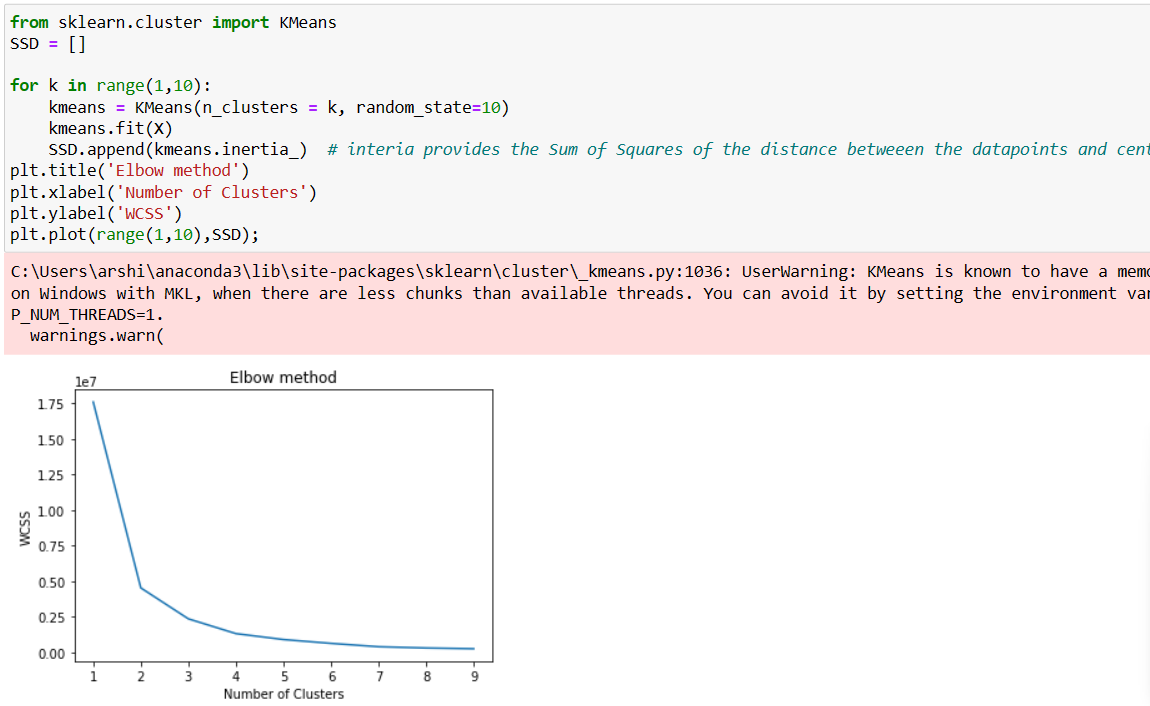

In [ ]:
## Another way of plotting elbow
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X) for k in range (2, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(2, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

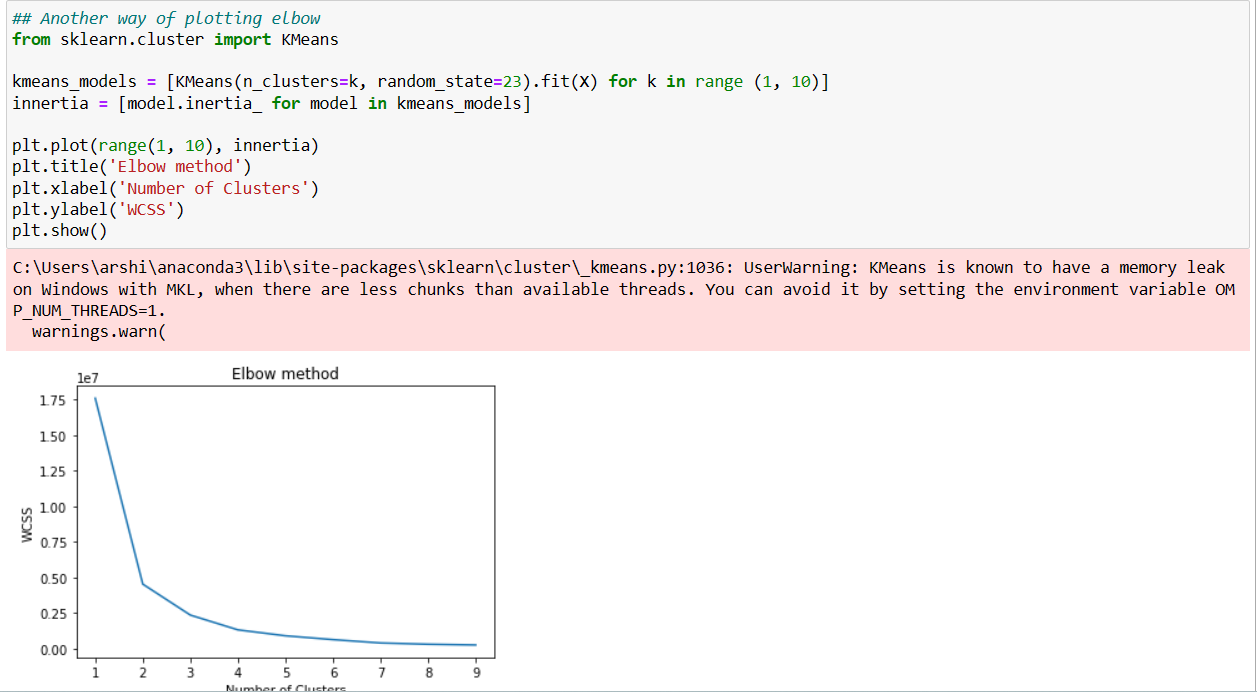

In [ ]:
### Silhouette method
from sklearn.metrics import silhouette_score
SS=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    SS.append(silhouette_score(X,kmeans.predict(X)))
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.plot(range(2,10),SS);

In [ ]:
## another method of plotting
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X)

print('Silhoutte score of our model is ' + str(silhouette_score(X, kmeans.labels_)))

In [ ]:
X['cluster_id'] = kmeans.labels_
#plt.figure(figsize=(11,7))
sns.scatterplot(data=X, x='Alcohol', y="Flavanoids", hue='cluster_id')
plt.title('Distribution of clusters based on Alcohol and Flavanoids')
plt.show()

# Clustering using Gaussian Mixturre Models

### GMM on Wine Dataset

In [ ]:
sns.pairplot(X);

In [ ]:
from sklearn.mixture import GaussianMixture
n_components=np.arange(2,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(X)
    aic_score=model.aic(X)
    bic_score=model.bic(X)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

In [ ]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

In [ ]:
# No of clusters = 3
# Model building

gmm_data=GaussianMixture(n_components=3,n_init=10)
gmm_data.fit(X)

In [ ]:
data_pred=gmm_data.predict(X)
data_pred

In [ ]:
gmm_data.means_

In [ ]:
gmm_data.covariances_

In [ ]:
gmm_data.weights_

In [ ]:
#Adding cluster label to dataframe
X['Label']=data_pred

In [ ]:
X['Label'].value_counts()

In [ ]:
#visualise the clusters
sns.pairplot(X, hue='Label');

In [ ]:
#plt.figure(figsize=(11,7))
sns.scatterplot(data=X, x='Alcohol', y="Flavanoids", hue='Label')
plt.title('Distribution of clusters based on Alcohol and Flavanoids')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creating samples
np.random.seed(100)

X1=np.random.normal(loc=25,scale=6,size=2000)
sns.distplot(X1,color='red',kde=True);

The code np.random.seed(100) X1=np.random.normal(loc=25,scale=6,size=2000) sns.distplot(X1,color='red',kde=True) creates a sample of 2000 data points from a normal distribution with mean (loc) of 25 and standard deviation (scale) of 6, and then visualizes the distribution of the sample using a histogram with a kernel density estimate (KDE) plot on top.

The random.seed function from NumPy's random module is used to set the random seed to 100, which ensures that the same random numbers are generated every time the code is run.

The random.normal function is then used to generate 2000 data points from a normal distribution with mean (loc) of 25 and standard deviation (scale) of 6. The resulting sample is stored in the variable X1.

The distplot function from Seaborn's distribution module is used to create a histogram of the data in X1, with a KDE plot overlaid on top. The color argument is used to specify the color of the histogram bars and the KDE plot, and the kde argument is set to True to include the KDE plot.

The resulting plot shows a histogram of the sample data, with a KDE plot overlaid on top. The histogram shows the distribution of the data, with the x-axis representing the values of the data and the y-axis representing the frequency or count of the data points in each bin. The KDE plot shows an estimate of the underlying probability density function (PDF) of the data, which is a smoother representation of the distribution of the data.

A KDE plot (Kernel Density Estimation plot) is a non-parametric way to estimate the probability density function (PDF) of a continuous random variable. It is a way of smoothing a histogram by estimating the probability density function that would have generated the observed data.

A KDE plot works by placing a kernel function (typically a Gaussian or normal distribution) at each data point, and then summing up the contributions from all the kernels to estimate the PDF. The bandwidth or smoothing parameter controls the width of the kernel, which affects the degree of smoothing applied to the data.

The resulting KDE plot shows a smooth curve that represents an estimate of the PDF of the data. The y-axis of the KDE plot represents the estimated density, and the x-axis represents the values of the variable. KDE plots are often used to visualize the distribution of a continuous variable and to identify any underlying patterns or clusters in the data.

In [ ]:
X2=np.random.normal(loc=45,scale=5,size=2000)
sns.distplot(X2,color='blue',kde=True);

In [ ]:
X3=np.random.normal(loc=65,scale=4,size=2000)
sns.distplot(X3,color='green',kde=True);

In [ ]:
X4=np.random.normal(loc=85,scale=4,size=2000)
sns.distplot(X4,color='yellow',kde=True);

In [ ]:
 ## Merging
    
X=np.hstack((X1,X2,X3,X4))
X

The code X=np.hstack((X1,X2,X3,X4)) horizontally stacks the four arrays X1, X2, X3, and X4 into a single array X.

The hstack function from NumPy's core module is used to horizontally stack the arrays. The function takes a tuple of arrays as input and concatenates them along the horizontal axis (axis=1). The resulting array X contains all the data from the four input arrays, arranged in a horizontal format.

The resulting array X has the same number of rows as each of the input arrays, and a total of four columns (corresponding to the four input arrays). This assumes that X1, X2, X3, and X4 all have the same number of rows.

In [ ]:
sns.distplot(X,kde=True);

In [ ]:
sns.distplot(X,kde=True,hist=False);

In [ ]:
# X is a Gaussian Mixture Model

### Building a GMM model with 4 clusters

In [ ]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=4,n_init=10)

The code gmm = GaussianMixture(n_components=4, n_init=10) creates an instance of the GaussianMixture class from the sklearn.mixture module with the following arguments:

n_components=4: The number of Gaussian components to fit to the data. In this case, n_components=4 specifies that the GMM should model the data as a mixture of four Gaussian distributions.
n_init=10: The number of times the algorithm should be run with different random initializations. The algorithm starts with different initial values of the parameters and runs the EM algorithm until convergence to find the best fit GMM. By default, n_init=1, but setting it to a higher value increases the chances of finding a better overall fit.
Once the GaussianMixture object is created, it can be fit to the data using the fit method.

In [ ]:
# Training
gmm.fit(X.reshape(-1,1))

The code gmm.fit(X.reshape(-1,1)) fits the Gaussian Mixture Model (GMM) to the data in X, which is reshaped to a one-dimensional array using the reshape method.

The fit method of the GaussianMixture object is used to fit the GMM to the data. The fit method estimates the parameters of the GMM, such as the mean and covariance of each component, using the Expectation-Maximization (EM) algorithm. The EM algorithm iteratively estimates the parameters of the GMM until convergence, which is when the likelihood of the data no longer improves.

The reshape method is used to convert the two-dimensional array X into a one-dimensional array, which is required by the fit method. The argument -1 in the reshape method means that the number of rows in the reshaped array should be automatically determined based on the size of the original array, and the number of columns should be 1.

In [ ]:
# Prediction
pred=gmm.predict(X.reshape(-1,1))
pred

In [ ]:
pred.shape

The code pred = gmm.predict(X.reshape(-1,1)) predicts the cluster labels for the data in X using the fitted Gaussian Mixture Model (GMM).

The predict method of the GaussianMixture object is used to predict the cluster labels for the data. The predict method assigns each data point to the cluster with the highest probability, based on the posterior probabilities calculated by the EM algorithm during the fitting process.

The argument to the predict method is the reshaped data X, which is a one-dimensional array that has been reshaped from the original data array. The reshape method is used to convert the two-dimensional array X into a one-dimensional array, which is required by the predict method. The argument -1 in the reshape method means that the number of rows in the reshaped array should be automatically determined based on the size of the original array, and the number of columns should be 1.

In [ ]:
np.unique(pred)

In [ ]:
gmm.means_

The means_ attribute of the GaussianMixture object is an array that contains the mean value of each Gaussian component in the GMM. Each row of the array corresponds to a Gaussian component, and the number of columns is equal to the number of features in the data. In this case, since the data X has only one feature (i.e., one-dimensional), the means_ array is a one-dimensional array that contains the mean value of each Gaussian component.

The means_ attribute can be used to inspect the mean values of each Gaussian component in the GMM, which can provide insights into the clustering of the data.

In [ ]:
gmm.covariances_

The code gmm.covariances_ retrieves the covariance matrices of each of the Gaussian components in the fitted Gaussian Mixture Model (GMM).

The covariances_ attribute of the GaussianMixture object is an array that contains the covariance matrix of each Gaussian component in the GMM. Each element of the array corresponds to a Gaussian component, and the number of dimensions of each covariance matrix is equal to the number of features in the data. In this case, since the data X has only one feature (i.e., one-dimensional), each covariance matrix is a scalar value that represents the variance of the data for that component.

The covariances_ attribute can be used to inspect the covariance matrices of each Gaussian component in the GMM, which can provide insights into the spread and shape of the clusters in the data.

In [ ]:
np.bincount(pred)

The code np.bincount(pred) counts the number of occurrences of each cluster label in the pred array.

The bincount function of the NumPy library is used to count the number of occurrences of each value in an array. In this case, the pred array contains the cluster labels assigned by the Gaussian Mixture Model (GMM) to each data point in the original data X. The bincount function counts the number of occurrences of each unique value in the pred array, which corresponds to the number of data points assigned to each cluster.

The output of np.bincount(pred) is an array of non-negative integers, where the value at index i represents the number of data points assigned to cluster i. The length of the array is equal to the number of unique cluster labels in the pred array, which is equal to the number of components in the GMM.

In [ ]:
gmm.weights_


The code gmm.weights_ retrieves the weight of each of the Gaussian components in the fitted Gaussian Mixture Model (GMM).

The weights_ attribute of the GaussianMixture object is an array that contains the weight of each Gaussian component in the GMM. The weights represent the proportion of data points assigned to each component, and they sum to 1.0.

The weights_ attribute can be used to inspect the contribution of each Gaussian component to the overall GMM, which can provide insights into the relative importance of each cluster in the data.

### Finding no of clusters

In [ ]:
# Resolve error for 1 cluster

n_components=np.arange(2,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(X.reshape(-1,1))
    aic_score=model.aic(X.reshape(-1,1))
    bic_score=model.bic(X.reshape(-1,1))
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)
    

This code performs Gaussian Mixture Model (GMM) fitting for different numbers of components, computes the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) scores for each model, and stores the scores in two separate lists.

The GaussianMixture object is initialized with the number of components specified by the n variable, and then fitted to the data using the fit method. The AIC and BIC scores are then computed using the aic and bic methods of the GaussianMixture object, respectively. The AIC and BIC scores are measures of the goodness-of-fit of the GMM to the data, and they take into account both the likelihood of the data given the model and the number of parameters in the model.

The AIC and BIC scores are then appended to separate lists (aic_scores and bic_scores) for each value of n. This allows us to compare the AIC and BIC scores for different numbers of components and choose the number of components that provides the best trade-off between model complexity and goodness-of-fit.

In [ ]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

#### No of clusters=4

In [ ]:
# Generating samples

gmm.sample(100000)

## Building GMM for the dataset

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

widths = np.random.normal(loc=50, scale=5, size=500)
heights = np.random.normal(loc=160, scale=10, size=500)

df = np.column_stack((widths, heights))

data = pd.DataFrame(df, columns=['widths', 'heights'])




In [ ]:
data

In [ ]:
sns.pairplot(data);

### Finding no of clusters

In [ ]:
n_components=np.arange(2,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(data)
    aic_score=model.aic(data)
    bic_score=model.bic(data)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

In [ ]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

No of clusters == 4 in gmm dataset, since this dataset is generated by chatgpt hence not converging at 4

In [ ]:
# Model building

gmm_data=GaussianMixture(n_components=4,n_init=10)
gmm_data.fit(data)

In [ ]:
data_pred=gmm_data.predict(data)
data_pred

In [ ]:
gmm_data.means_

In [ ]:
gmm_data.covariances_

In [ ]:
gmm_data.weights_

## Adding Clsuster labels to DF

In [ ]:
data['Label']=data_pred

In [ ]:
data

In [ ]:
data['Label'].value_counts()

### Visuaise the clusters

In [ ]:
sns.pairplot(data, hue='Label');

# Mall customer segmentation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer=pd.read_csv('Mall_customers.csv')

In [ ]:
customer

## Preprocessing

In [ ]:
customer=customer.drop(['CustomerID'],axis=1)
customer

In [ ]:
# Convereting categorical to numeric

cust=pd.get_dummies(customer)
cust

In [ ]:
# Standardisation of features

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X=sc.fit_transform(cust)
X

In [ ]:
# COnverting to DF

X=pd.DataFrame(X, columns=cust.columns)
X

## Dimnensionality reduction using TSNE

In [ ]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2,random_state=100)
type(tsne)

In [ ]:
X_tsne=tsne.fit_transform(X)
X_tsne

In [ ]:
# Visualisation
plt.scatter(X_tsne[:,0],X_tsne[:,1]);

### Findings:

1. Formation of clearly defined clusters.

2. There can be 2 clusters.

## Clustering using GMM

In [ ]:
from sklearn.mixture import GaussianMixture
n_comps=np.arange(2,20,1)
aic_score=[]
bic_score=[]
for n in n_comps:
    model=GaussianMixture(n_components=n,
                          random_state=10,
                        n_init=5)
    model.fit(X)
    aic_score.append(model.aic(X))
    bic_score.append(model.bic(X))

In [ ]:
print(aic_score)

In [ ]:
print(bic_score)

In [ ]:
# Plotting
plt.plot(n_comps,aic_score,c='b',label='AIC')
plt.plot(n_comps,bic_score,c='g',label='BIC')
plt.legend();

### No of clusters is 2

## Building GM model with 2 clusters

In [ ]:
gm=GaussianMixture(n_components=2,random_state=100,n_init=5)

In [ ]:
gm.fit(X)

In [ ]:
pred=gm.predict(X)
pred

In [ ]:
gm.means_

In [ ]:
gm.covariances_

In [ ]:
gm.weights_

### Adding Label column to the DF

In [ ]:
customer['Label']=pred

In [ ]:
customer

## Insights:

In [ ]:
customer['Label'].value_counts()

In [ ]:
customer['Label'].value_counts()/sum(customer['Label'].value_counts())

In [ ]:
customer[customer['Genre']=='Male']

In [ ]:
customer[customer['Genre']=='Male'][customer['Label']==0]

1. All Males form a market segment, constituting 44% of the customer base. 

In [ ]:
customer[customer['Genre']=='Female'][customer['Label']==0]

In [ ]:
customer[customer['Genre']=='Female'][customer['Label']==1]

2. All female customers form a segment, constituting 56 % of the customer base.

In [ ]:
# Forming samples

gm.sample(10000)

# DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X) # fitting the data to the object
distances,indices=nbrs.kneighbors(X)

In [ ]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into 3 clusters
dbscan = DBSCAN(eps = 160, min_samples = 3).fit(X) # fitting the model
labels = dbscan.labels_ # getting the labels

In [ ]:
# Plot the clusters
plt.scatter(x=X['Alcohol'],y=X['Mg'], c = X['Label'], cmap= "plasma") # plotting the clusters
plt.xlabel("Cash Advance") # X-axis label
plt.ylabel("Purchases") # Y-axis label
plt.show() # showing the plot